In [1]:
import sys
sys.path.append('../../')

In [2]:
from scripts.utils import data_path, set_mpl, read_hamelin, add_datetime_features, read_london, read_trentino
from scripts.calendar import timeanddate_calendar
from scripts.google_trends import download_google_trends

matplotlib settings set


In [3]:
import pandas as pd
import numpy as np

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

import os
import tqdm
import requests
from datetime import datetime, timedelta
import time

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing

import lightgbm as lgb

from pytrends.request import TrendReq

In [4]:
hamelin_energy, hamelin_weather, hamelin_metadata, hamelin_twitter, hamelin_trends = read_hamelin()



    Loading Hamelin data from /Users/sdbykov/not_work/swarm_energAIser/0_data/.
    Houses number removed: 6, 17, 24, 25. 
    Houses with PV: ['13', '15', '26', '33'] 
    HOUSEHOLD and HEATPUMP energy consumption are separated. 
    Resolution: 60min 

    May-June 2019 data for home #34 excluded 
    Data before 2018-05-18 excluded (gaps)
    Data with zero difference between consecutive values dropped (malfunction)

    reutrns:
    df_energy: pd.DataFrame with energy consumption data
    df_weather: pd.DataFrame with weather data
    df_metadata: pd.DataFrame with metadata

    


In [ ]:
import warnings
warnings.filterwarnings('ignore')
all_trends_DE = download_google_trends(geo_id='DE',     
                           list_primary_use = ['Education','Office','Excel'],
                           start_year=2018,
                           end_year=2020,
                           show_viz=True)

successful
----------------------------------------------------------------------------------------------------
DE/Office/Met Office


In [3]:
import pandas as pd
all_trends_DE = pd.read_csv('/Users/sdbykov/Downloads/all_trends_DE.csv')
all_trends_DE = all_trends_DE.pivot_table(index='date',columns='title',values='value')
all_trends_DE

title,Academic year,Address,BT Email,BT Group,Bachelor's degree,Board of education,Box office,Canvas,Chair,Closure,...,The Office,Twelfth Grade,United States Postal Service,User Account,Windows 10,Writing,Xfinity,macOS,new,school holiday
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,-1.017355,-1.962368,-0.480253,-0.782647,-0.555858,-0.424263,3.895025,-1.201761,1.950384,-0.977812,...,0.054698,1.232552,0.122252,2.237211,0.264958,-1.306370,-0.687932,0.260072,4.605776,6.859786
2018-01-02,-0.531798,0.608637,-0.480253,-0.782647,-0.555858,2.140601,0.780783,-0.845815,0.723549,-0.977812,...,0.300816,-0.481515,0.720632,2.527261,2.187971,-0.564762,0.060394,1.845782,1.266515,6.432585
2018-01-03,-1.462448,0.374909,-0.480253,1.831625,0.170808,0.611548,1.035006,-1.486519,0.635918,-0.977812,...,0.005475,1.453722,0.920092,2.672286,1.848616,0.424048,-0.687932,2.797208,0.510455,3.655773
2018-01-04,0.115611,0.725501,-0.480253,-0.782647,-0.140621,-0.424263,1.035006,-0.489868,0.898811,-0.249024,...,-0.634430,-0.481515,0.720632,2.092186,3.092918,-0.132158,0.769334,2.374352,0.384446,3.228572
2018-01-05,-0.815039,0.082750,0.906231,0.400000,-0.140621,-0.424263,-0.045445,1.503433,0.811180,0.707510,...,-0.092972,-0.481515,-0.276668,1.947161,2.979800,-0.379360,-0.687932,2.480066,0.132426,1.946966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,-0.118654,-1.518868,-0.490935,-0.891777,-0.739647,-0.487534,1.012130,-0.269624,1.218351,0.030983,...,-1.131443,-0.540932,-1.796445,2.677714,-0.067242,-0.782231,-0.709170,0.737768,0.401230,-0.456739
2020-12-28,-1.290436,0.138446,-0.490935,-0.891777,-0.634441,-0.487534,0.064881,0.113894,1.400195,0.232930,...,0.488317,0.845534,1.881371,1.797877,-0.016868,-2.259629,-0.709170,0.566544,0.591676,-0.694856
2020-12-29,-0.177243,-0.082529,-0.490935,-0.891777,-0.599372,-0.487534,-1.049528,-0.045905,1.218351,-0.130575,...,-1.224000,0.734616,0.214860,1.546495,-0.167991,-1.213139,0.740094,0.994604,0.782121,-0.575797


In [6]:
all_trends_DE = all_trends_DE.pivot_table(index='date',columns='title',values='value')
all_trends_DE.index = pd.to_datetime(all_trends_DE.index)
all_trends_DE

title,Bachelor's degree,Board of education,Box office,Calculation,Calendar date,Cell,Chart,College,Column,Computer file,Continuing education,Course,Data,Distance education,Drum,Education,Education Perfect,Education minister,Education policy,File format,Formula,Function,Google Sheets,Higher education,List,Mail,Microsoft 365,Microsoft Corporation,Microsoft Excel,Microsoft Office,Microsoft Word,Minecraft: Education Edition,Minister,National Education Policy 2020,Office,PDF,Physical education,Row,School of education,Sex Education,Sex Education - Season 2,Sex Education - Season 3,Special education,Spreadsheet,Student,Table,Teacher,The ODP Corporation,The Office,Twelfth Grade,United States Postal Service,Visual Basic for Applications,WPS Office
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01,-0.732247,-0.380488,2.835029,-1.701955,-0.835075,-1.879842,0.080808,-0.847120,-1.695630,-1.294015,-0.971088,0.065073,-2.290022,2.597015,0.656204,-1.266961,-0.397412,-0.577597,-0.492749,-0.402257,-1.938407,-1.851778,-1.695204,-1.197500,-1.932483,-2.094107,-1.647308,-1.341166,-1.396562,-0.728353,-1.867342,-0.435320,-0.823702,-0.386383,-1.337687,-1.279751,-0.510363,-0.970559,-0.620037,1.706351,-0.404636,-0.418054,-1.413080,1.501302,-1.654162,-0.876418,-1.316851,1.383712,1.624920,-0.475591,-0.159863,-1.581478,-0.689359
2018-01-02,-0.523031,-0.380488,0.916468,-0.362415,0.137436,-0.245743,1.730794,0.546823,-0.172820,-0.223330,-0.149260,0.501369,-0.017194,0.748552,-0.994674,0.320116,-0.397412,-0.577597,-0.492749,-0.182707,-0.339097,-0.411332,-0.484531,0.475348,-0.658739,0.378811,-0.169157,0.750183,0.368281,1.109046,0.066245,1.204351,-0.823702,-0.386383,0.082780,-0.152953,-0.317272,-0.777679,-0.620037,-0.462916,-0.404636,-0.418054,0.248186,-0.424658,0.594697,-0.616906,-1.214785,1.636283,0.493048,-0.475591,0.632727,-0.359638,-0.689359
2018-01-03,0.000009,-0.380488,0.858330,-0.287996,-0.186735,-0.334072,0.905801,2.027888,-0.052599,0.283837,0.789972,1.286702,0.091036,0.804566,-3.427546,0.320116,-0.397412,-0.577597,-0.492749,-0.018045,-0.060956,0.031883,0.367424,0.434547,-0.272756,0.217534,-0.076772,0.952571,0.405049,1.179715,0.066245,-0.435320,-1.035916,-0.386383,0.556269,-0.152953,-0.317272,-0.276192,-0.620037,-0.462916,-0.404636,-0.418054,-1.510802,-0.195377,-0.154922,-0.703410,-1.316851,0.221886,0.099354,2.643286,0.210012,0.303646,-0.689359
2018-01-04,-0.209207,-0.380488,1.207159,0.679450,0.461606,0.460895,2.405788,1.243795,-0.493412,0.621948,0.261654,1.635739,-0.017194,0.020370,0.308651,0.622416,-0.397412,-0.577597,-0.492749,0.750380,0.147649,-0.245126,0.412264,-0.299874,-0.311355,0.432570,0.107997,1.087497,0.772724,0.897038,0.710774,-0.435320,-0.611488,-0.386383,0.240609,0.359228,-0.655181,0.148143,1.002657,-0.462916,-0.404636,-0.418054,0.443629,-1.020789,1.011153,-0.616906,-1.010653,-0.939940,-0.638823,-0.475591,0.368530,0.757472,1.031352
2018-01-05,-0.209207,-0.380488,0.102533,-0.139158,-0.402848,0.284236,1.430796,0.111216,-0.653708,0.396540,0.144250,-0.022186,0.523956,-1.323966,-1.255339,0.244541,-0.397412,-0.577597,-0.492749,0.091730,0.147649,0.031883,-0.215492,-1.197500,0.383415,0.593847,-0.261541,0.952571,0.515351,0.119677,0.066245,-0.435320,-0.929809,-0.386383,-0.180270,-0.152953,-1.137909,0.803933,0.387152,-0.462916,-0.404636,-0.418054,1.274262,0.263185,-0.488087,-0.703410,-0.194125,0.322914,-0.688035,1.041701,-0.688256,0.303646,-0.689359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,-0.565566,0.823297,0.130669,-1.604724,-1.062791,-1.927224,-0.762419,-0.649173,-1.713406,-1.095325,-1.105439,-1.179479,-1.259100,1.516212,1.607242,-1.276668,-0.376562,-0.243511,-0.440917,-1.506315,-1.955664,-1.730035,NaN,-1.086509,-1.166179,-2.011191,-1.293352,-1.104132,-1.528608,-0.896182,-1.879654,-0.450580,-0.070870,2.833874,-1.552000,-1.660944,-0.745035,-1.886692

In [7]:
df_holiday = timeanddate_calendar(geo_id='germany',start_year=2017,end_year=2021+1)
df_holiday

,date,holiday_Name,holiday_Type
0,2017-01-01,weekend,weekend
1,2017-01-02,weekday,weekday
2,2017-01-03,weekday,weekday
3,2017-01-04,weekday,weekday
4,2017-01-05,weekday,weekday
...,...,...,...
2186,2022-12-27,weekday,weekday
2187,2022-12-28,weekday,weekday
2188,2022-12-29,weekday,weekday
2189,2022-12-30,weekday,weekday


In [8]:
df_holiday_encode = df_holiday.copy()
df_holiday_encode[['holiday_Name', 'holiday_Type']] = df_holiday_encode[['holiday_Name', 'holiday_Type']].astype('str').apply(preprocessing.LabelEncoder().fit_transform)
df_holiday_encode.columns = df_holiday_encode.columns+'_encode'
df_holiday_encode = df_holiday_encode.rename(columns={'date_encode':'date'})

In [9]:
HOME_mean =  hamelin_energy.loc[:, hamelin_energy.columns.str.contains('HOME')].mean(axis=1)
TOT_mean =  hamelin_energy.loc[:, hamelin_energy.columns.str.contains('TOT')].mean(axis=1)
HEAT_mean =  hamelin_energy.loc[:, hamelin_energy.columns.str.contains('HEAT')].mean(axis=1)
substation_mean =  hamelin_energy.loc[:, hamelin_energy.columns.str.contains('substation')].mean(axis=1)

### HOME

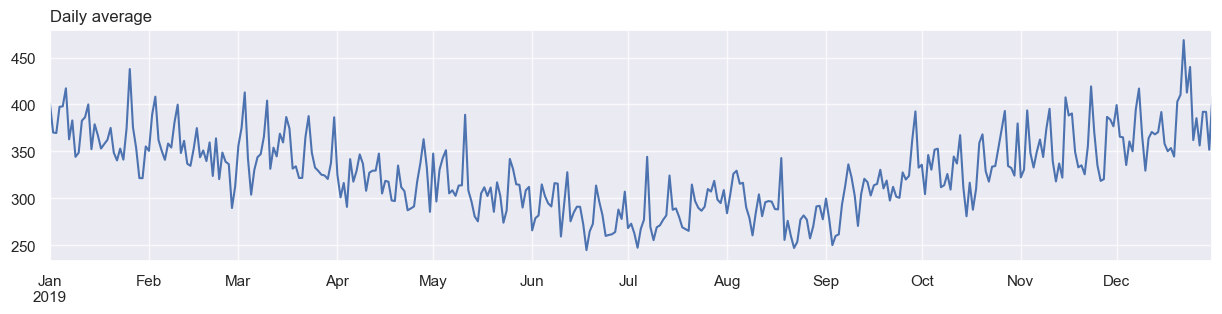

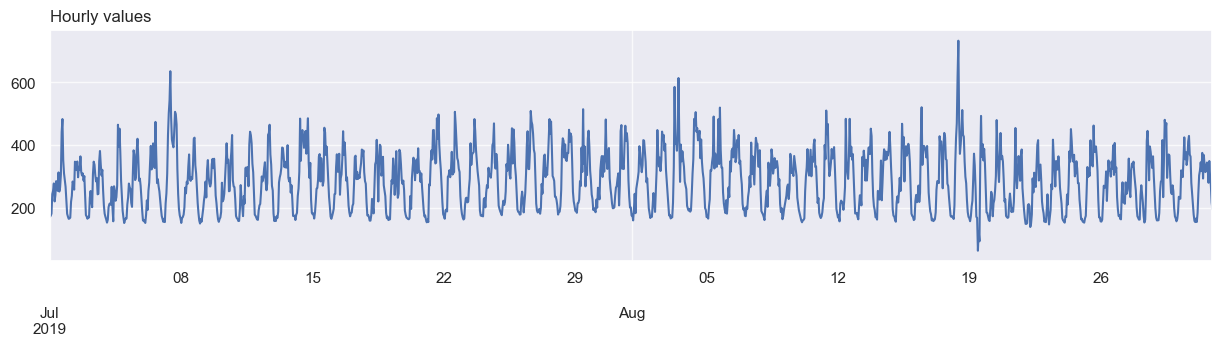

In [10]:
HOME_mean.loc['2019'].resample('D').mean().plot(title='Daily average', figsize=(15,3))
plt.show()
HOME_mean.loc['2019-07':'2019-08'].plot(title='Hourly values', figsize=(15,3))
plt.show()

In [11]:
df_dataset = HOME_mean.rename('load').to_frame().copy()


index_temp = df_dataset.index.copy()

df_dataset['date'] = pd.to_datetime(df_dataset.index.date)
df_dataset['year'] = df_dataset.index.year.astype('int')
df_dataset['weekday'] = df_dataset.index.weekday
df_dataset['hour'] = df_dataset.index.hour + df_dataset.index.minute/60
df_dataset['timeofweek'] = df_dataset['hour'] + df_dataset['weekday']*24

df_dataset['load_shift24'] = df_dataset['load'].shift(24)
df_dataset['load_shift168'] = df_dataset['load'].shift(168)

df_dataset = df_dataset.merge(hamelin_weather['WEATHER_T'], left_index=True, right_index=True)
df_dataset['WEATHER_T_roll24_mean'] = df_dataset['WEATHER_T'].rolling(24).mean()

df_dataset = df_dataset.merge(df_holiday, on='date')
df_dataset = df_dataset.merge(df_holiday_encode, on='date')
df_dataset = df_dataset.merge(all_trends_DE.reset_index(), on='date')
#df_dataset = df_dataset.drop('date',axis=1)
df_dataset.index = index_temp


df_dataset

,load,date,year,weekday,hour,timeofweek,load_shift24,load_shift168,WEATHER_T,WEATHER_T_roll24_mean,holiday_Name,holiday_Type,holiday_Name_encode,holiday_Type_encode,Bachelor's degree,Board of education,Box office,Calculation,Calendar date,Cell,Chart,College,Column,Computer file,Continuing education,Course,Data,Distance education,Drum,Education,Education Perfect,Education minister,Education policy,File format,Formula,Function,Google Sheets,Higher education,List,Mail,Microsoft 365,Microsoft Corporation,Microsoft Excel,Microsoft Office,Microsoft Word,Minecraft: Education Edition,Minister,National Education Policy 2020,Office,PDF,Physical education,Row,School of education,Sex Education,Sex Education - Season 2,Sex Education - Season 3,Special education,Spreadsheet,Student,Table,Teacher,The ODP Corporation,The Office,Twelfth Grade,United States Postal Service,Visual Basic for Applications,WPS Office
2018-05-18 01:00:00,183.358877,2018-05-18,2018,4,1.0,97.0,NaN,NaN,10.200000,NaN,weekday,weekday,20,7,-0.418423,-0.380488,1.149021,-0.436834,0.569662,-0.024918,0.305806,-1.021363,0.267993,0.340189,-0.501472,-0.720260,0.956875,0.300440,-0.734009,-0.586785,-0.397412,-0.577597,-0.492749,-0.182707,-0.339097,0.142686,0.412264,-1.197500,0.692201,0.325052,0.246573,0.075554,0.405049,-0.092330,0.300619,1.516669,-0.080952,-0.386383,-0.285490,0.256792,-0.703454,0.611053,0.834792,-0.462916,-0.404636,2.935762,-0.533586,-0.057809,-0.571378,-0.530401,-0.500323,0.272400,-0.983306,-0.475591,-0.001345,0.478194,-0.689359
2018-05-18 02:00:00,168.608142,2018-05-18,2018,4,2.0,98.0,NaN,NaN,9.900000,NaN,weekday,weekday,20,7,-0.418423,-0.380488,1.149021,-0.436834,0.569662,-0.024918,0.305806,-1.021363,0.267993,0.340189,-0.501472,-0.720260,0.956875,0.300440,-0.734009,-0.586785,-0.397412,-0.577597,-0.492749,-0.182707,-0.339097,0.142686,0.412264,-1.197500,0.692201,0.325052,0.246573,0.075554,0.405049,-0.092330,0.300619,1.516669,-0.080952,-0.386383,-0.285490,0.256792,-0.703454,0.611053,0.834792,-0.462916,-0.404636,2.935762,-0.533586,-0.057809,-0.571378,-0.530401,-0.500323,0.272400,-0.983306,-0.475591,-0.001345,0.478194,-0.689359
2018-05-18 03:00:00,212.435030,2018-05-18,2018,4,3.0,99.0,NaN,NaN,9.400000,NaN,weekday,weekday,20,7,-0.418423,-0.380488,1.149021,-0.436834,0.569662,-0.024918,0.305806,-1.021363,0.267993,0.340189,-0.501472,-0.720260,0.956875,0.300440,-0.734009,-0.586785,-0.397412,-0.577597,-0.492749,-0.182707,-0.339097,0.142686,0.412264,-1.197500,0.692201,0.325052,0.246573,0.075554,0.405049,-0.092330,0.300619,1.516669,-0.080952,-0.386383,-0.285490,0.256792,-0.703454,0.611053,0.834792,-0.462916,-0.404636,2.935762,-0.533586,-0.057809,-0.571378,-0.530401,-0.500323,0.272400,-0.983306,-0.475591,-0.001345,0.478194,-0.689359
2018-05-18 04:00:00,366.932407,2018-05-18,2018,4,4.0,100.0,NaN,NaN,9.100000,NaN,weekday,weekday,20,7,-0.418423,-0.380488,1.149021,-0.436834,0.569662,-0.024918,0.305806,-1.021363,0.267993,0.340189,-0.501472,-0.720260,0.956875,0.300440,-0.734009,-0.586785,-0.397412,-0.577597,-0.492749,-0.182707,-0.339097,0.142686,0.412264,-1.197500,0.692201,0.325052,0.246573,0.075554,0.405049,-0.092330,0.300619,1.516669,-0.080952,-0.386383,-0.285490,0.256792,-0.703454,0.611053,0.834792,-0.462916,-0.404636,2.935762,-0.533586,-0.057809,-0.571378,-0.530401,-0.500323,0.272400,-0.983306,-0.475591,-0.001345,0.478194,-0.689359
2018-05-18 05:00:00,456.314655,2018-05-18,2018,4,5.0,101.0,NaN,NaN,8.700000,NaN,weekday,weekday,20,7,-0.418423,-0.380488,1.149021,-0.436834,0.569662,-0.024918,0.305806,-1.021363,0.267993,0.340189,-0.501472,-0.720260,0.956875,0.300440,-0.734009,-0.586785,-0.397412,-0.577597,-0.492749,-0.182707,-0.339097,0.142686,0.412264,-1.197500,0.692201,0.325052,0.246573,0.075554,0.405049,-0.092330,0.300619,1.516669,-0.080952,-0.386383,-0.285490,0.256792,-0.703454,0.611053,0.834792,-0.462916,-0.404636,2.935762,-0.533586,-0.057809,-0.571378,-0.530401,-0.500323,0.272400,-0.983306,-0.475591,-0.001345,0.478194,-0.689359
...,...,...,...,...,...,...,...,...,...,...,...,.

## 1st model: temporal feature + weather feature

C:\Users\user\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='timeofweek', ylabel='load'>

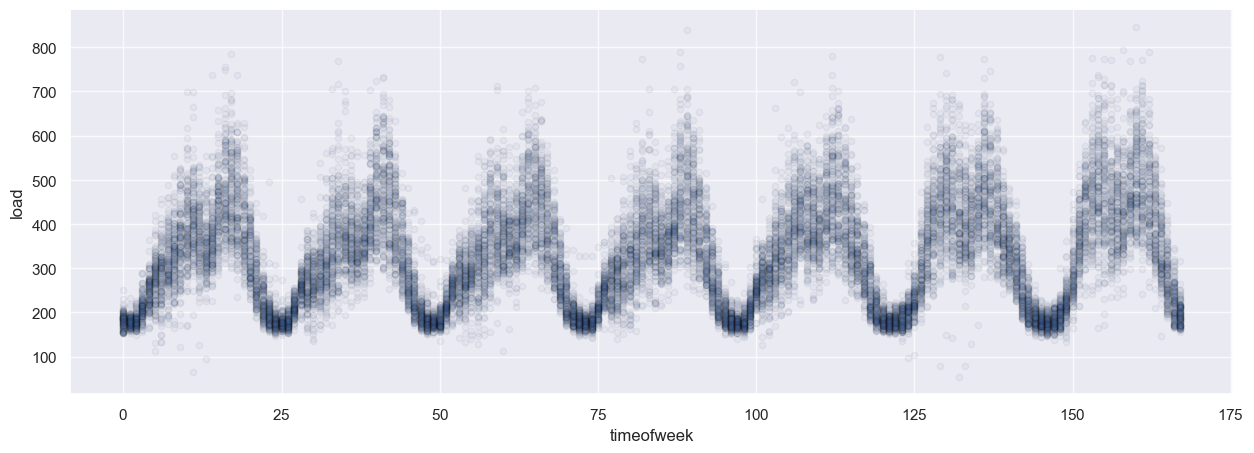

In [12]:
df_dataset.plot(kind='scatter',x='timeofweek',y='load', figsize=(15,5),alpha=0.05)

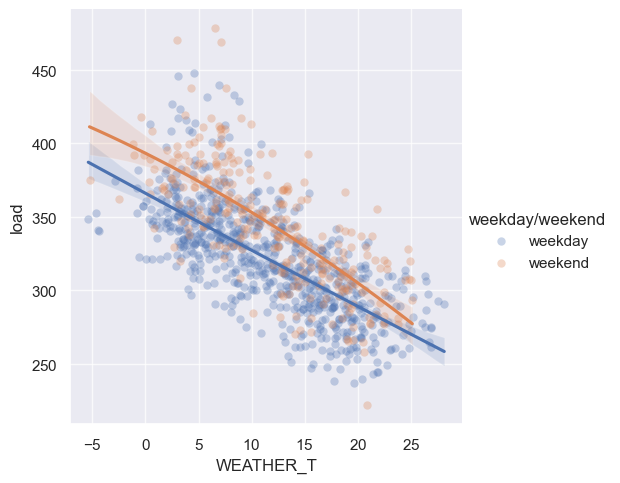

In [13]:
# Scatter plot for demand and outdoor temperature
df_plot = df_dataset.resample('D').mean().copy()
df_plot['weekday/weekend'] = 'weekday'
df_plot.loc[df_plot['weekday']>4, 'weekday/weekend'] ='weekend'

sns.lmplot(x='WEATHER_T', y='load', hue="weekday/weekend",
           data=df_plot, order=2, scatter_kws={'alpha':0.3})

In [14]:
list_feat = ['weekday','hour','WEATHER_T', 'WEATHER_T_roll24_mean']

Model: LGBM
R SQUARED: 0.7393
MAE: 42.4454


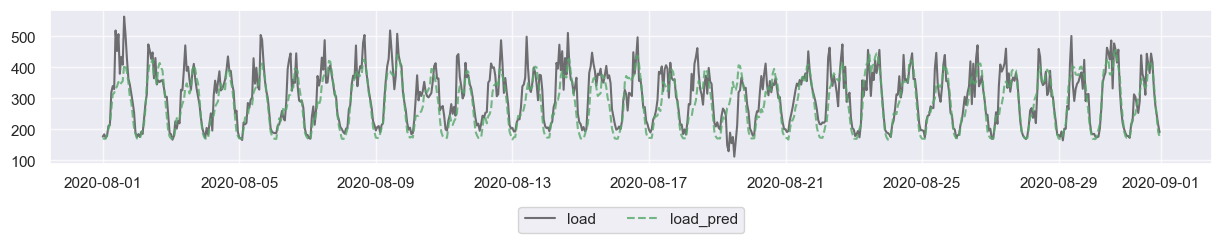

In [15]:
traindata = df_dataset.loc[:'2019'].copy()
testdata = df_dataset.loc['2020':].copy()

LGB_model = lgb.LGBMRegressor()
LGB_model.fit(traindata[list_feat], traindata['load'])
testdata['load_pred'] = LGB_model.predict(testdata[list_feat])
errors = abs(testdata['load_pred'] - testdata['load'])
RSQUARED = r2_score(testdata['load'], testdata['load_pred'])
MAE = mean_absolute_error(testdata['load'], testdata['load_pred'])

print("Model: LGBM")
print("R SQUARED: "+str(round(RSQUARED,4)))
print("MAE: "+str(round(MAE,4)))

plt.figure(figsize=(15,2))
plt.plot(testdata.loc['2020-8'].index, testdata.loc['2020-8','load'], '-k', alpha=0.6, label='load')
plt.plot(testdata.loc['2020-8'].index, testdata.loc['2020-8','load_pred'], '--g', alpha=0.8, label='load_pred')
plt.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.5))

## 2nd model: add calendar data

In [16]:
list_feat = ['weekday','hour','WEATHER_T', 'WEATHER_T_roll24_mean',
             'holiday_Name_encode','holiday_Type_encode']

Model: LGBM
R SQUARED: 0.741
MAE: 42.2192


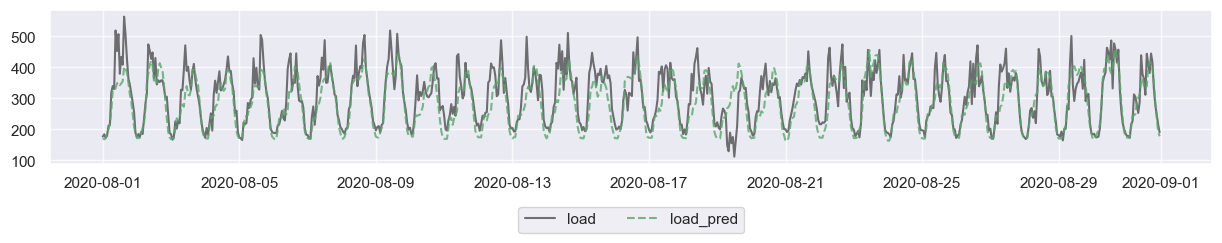

In [17]:
traindata = df_dataset.loc[:'2019'].copy()
testdata = df_dataset.loc['2020':].copy()

LGB_model = lgb.LGBMRegressor()
LGB_model.fit(traindata[list_feat], traindata['load'])
testdata['load_pred'] = LGB_model.predict(testdata[list_feat])
errors = abs(testdata['load_pred'] - testdata['load'])
RSQUARED = r2_score(testdata['load'], testdata['load_pred'])
MAE = mean_absolute_error(testdata['load'], testdata['load_pred'])

print("Model: LGBM")
print("R SQUARED: "+str(round(RSQUARED,4)))
print("MAE: "+str(round(MAE,4)))

plt.figure(figsize=(15,2))
plt.plot(testdata.loc['2020-8'].index, testdata.loc['2020-8','load'], '-k', alpha=0.6, label='load')
plt.plot(testdata.loc['2020-8'].index, testdata.loc['2020-8','load_pred'], '--g', alpha=0.8, label='load_pred')
plt.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.5))

## 3rd model: add lag features

In [18]:
list_feat = ['weekday','hour','WEATHER_T', 'WEATHER_T_roll24_mean',
             'holiday_Name_encode','holiday_Type_encode',
             'load_shift24', 'load_shift168']

Model: LGBM
R SQUARED: 0.7811
MAE: 38.5363


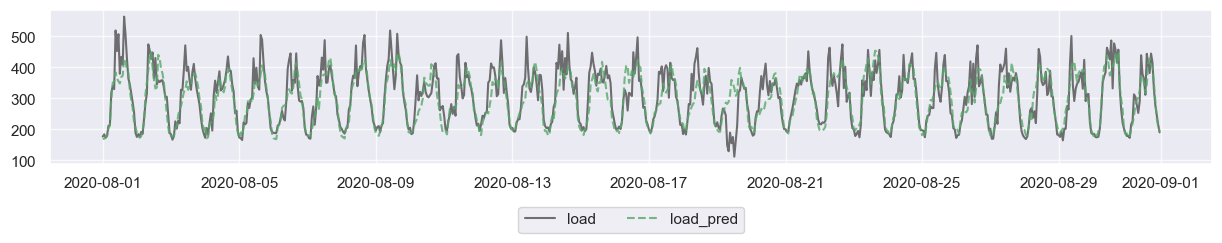

In [19]:
traindata = df_dataset.loc[:'2019'].copy()
testdata = df_dataset.loc['2020':].copy()

LGB_model = lgb.LGBMRegressor()
LGB_model.fit(traindata[list_feat], traindata['load'])
testdata['load_pred'] = LGB_model.predict(testdata[list_feat])
errors = abs(testdata['load_pred'] - testdata['load'])
RSQUARED = r2_score(testdata['load'], testdata['load_pred'])
MAE = mean_absolute_error(testdata['load'], testdata['load_pred'])

print("Model: LGBM")
print("R SQUARED: "+str(round(RSQUARED,4)))
print("MAE: "+str(round(MAE,4)))

plt.figure(figsize=(15,2))
plt.plot(testdata.loc['2020-8'].index, testdata.loc['2020-8','load'], '-k', alpha=0.6, label='load')
plt.plot(testdata.loc['2020-8'].index, testdata.loc['2020-8','load_pred'], '--g', alpha=0.8, label='load_pred')
plt.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.5))

## 4rd model: add google trends data

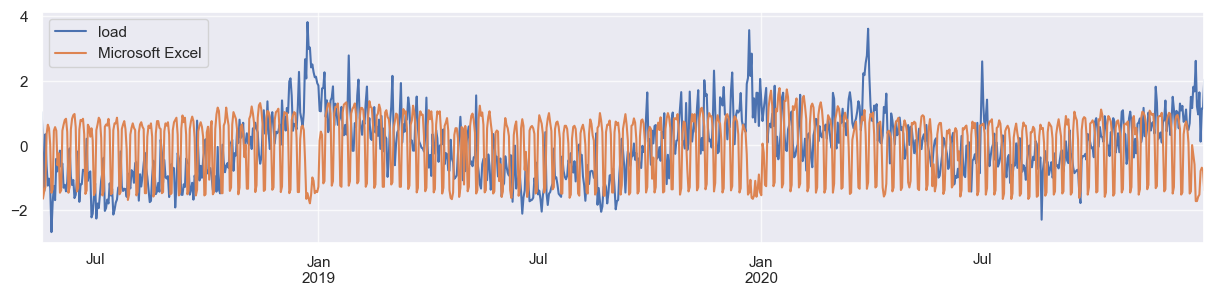

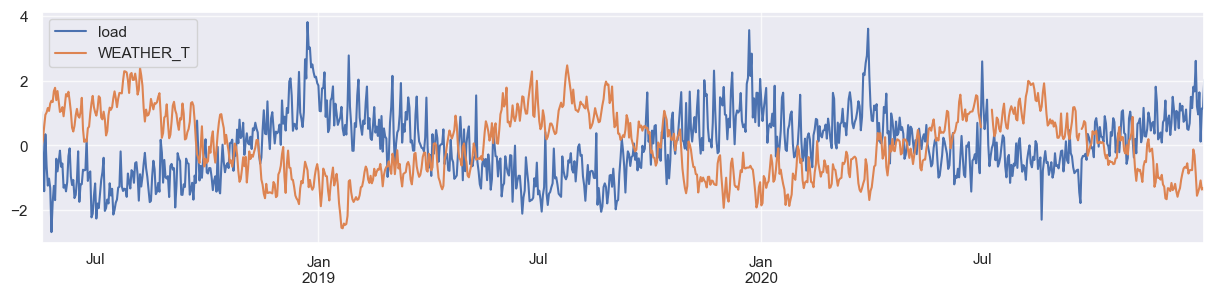

In [20]:
df_plot = df_dataset.resample('D').mean()
df_plot = (df_plot-df_plot.mean())/df_plot.std()
df_plot[['load','Microsoft Excel']].loc[:'2020'].plot(figsize=(15,3))
plt.show()
df_plot[['load','WEATHER_T']].loc[:'2020'].plot(figsize=(15,3))
plt.show()

In [21]:
list_feat = ['weekday','hour','WEATHER_T', 'WEATHER_T_roll24_mean',
             'holiday_Name_encode','holiday_Type_encode',
             'load_shift24', 'load_shift168',
             'Microsoft Excel', 'Education']

Model: LGBM
R SQUARED: 0.7866
MAE: 38.3077


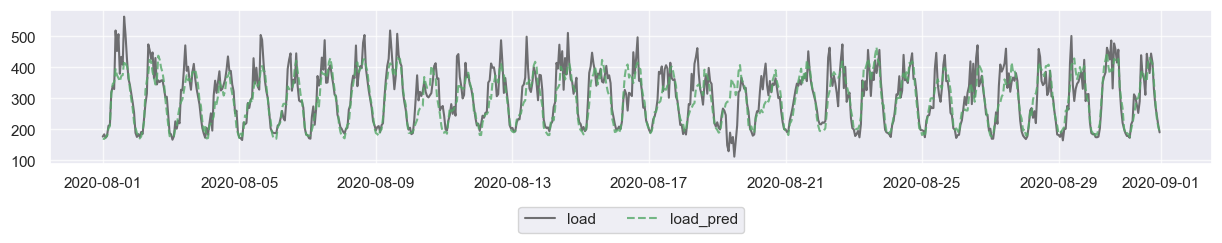

In [22]:
traindata = df_dataset.loc[:'2019'].copy()
testdata = df_dataset.loc['2020':].copy()

LGB_model = lgb.LGBMRegressor()
LGB_model.fit(traindata[list_feat], traindata['load'])
testdata['load_pred'] = LGB_model.predict(testdata[list_feat])
errors = abs(testdata['load_pred'] - testdata['load'])
RSQUARED = r2_score(testdata['load'], testdata['load_pred'])
MAE = mean_absolute_error(testdata['load'], testdata['load_pred'])

print("Model: LGBM")
print("R SQUARED: "+str(round(RSQUARED,4)))
print("MAE: "+str(round(MAE,4)))

plt.figure(figsize=(15,2))
plt.plot(testdata.loc['2020-8'].index, testdata.loc['2020-8','load'], '-k', alpha=0.6, label='load')
plt.plot(testdata.loc['2020-8'].index, testdata.loc['2020-8','load_pred'], '--g', alpha=0.8, label='load_pred')
plt.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.5))